http://3ms.huawei.com/km/groups/3803117/blogs/details/13946629?l=zh-cn

一、破冰船的破冰次数
一艘破冰船在极地考察，航行区域视作一个矩阵（由若干个纵横排列的格子组成），初始时破冰船周围均是冰层，船可以上下左右方向航行。由于破冰船可以通过船头部分压碎冰，因此前进方向的一个格子的冰层压碎成【可通行的水域】。【可通行的水域】在船离开limit时长后，将立刻重新结冻为冰层。

注意：当重复通过【可通行的水域】时，再次结冰时间会重置。

船的初始位置是【可通行的水域】，现在给定航线route，其中U、D、L、R表示上下左右的行驶方向；每次行驶前进一个格子为1，问在行驶路线中，破冰船共破了多少次？

用例一：
 router = "URDLR"；

 limit = 3

 输出 = 4

图例如下：

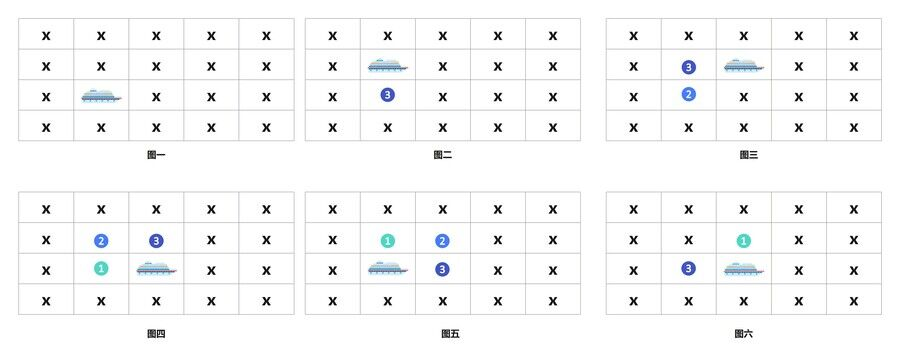

用例解释：

图一：船初始状态处于起点位置

图二：router[0] 船向上走一格，破冰1次，初始位置在3次移动后结冰

图三：router[1] 船向右移动一格，破冰2次，走过的位置分别为2次后结冰和3次后结冰

图四：router[2] 船向下移动一格，破冰三次

图五：router[3] 船向左移动一格，注意：这个位置是最初使的位置，船移动过来的时候，刚刚结冰，所以需要再次破冰一次，故破冰4次

图六：router[4] 船向右移动一格，因为即将移动过来的位置还没有结冰，所有不需要再次破冰




结论：所以最后的破冰次数为4次！




用例二：
router = "RDDUURDLLURU";

limit = 4

输出 = 9




In [1]:
from leetcode import *

In [2]:
class Solution:
    def __init__(self):
        self.direct = {
            "U": [0, 1],
            "D": [0, -1],
            "L": [1, 0],
            "R": [-1, 0],
        }
        self.load = {}
        self.count = 1

    def get_number_ice_break(self, route: str, limit: int) -> int:
        start_x, start_y = 0, 0
        self.load[(0, 0)] = limit
        for way in route:
            x, y = self.direct[way]
            start_x += x
            start_y += y
            for block in self.load.keys():
                if self.load[block] == 0:
                    self.load[block] = limit
                else:
                    self.load[block] -= 1
            # 如果走过此处
            if self.load.get((start_x, start_y)):
                # 走过但是冻上了
                if self.load[(start_x, start_y)] == 0:
                    self.load[(start_x, start_y)] = limit
                    self.count += 1
                # 走过没冻上
                else:
                    self.load[(start_x, start_y)] -= 1
            # 没走过
            else:
                self.load[(start_x, start_y)] = limit
                self.count += 1
        return self.count


In [3]:
router = "URDLR"
limit = 3

In [4]:
sol = Solution()
sol.get_number_ice_break(router, limit)

4